# Смотрим в дату

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = '~/data/tinkoff/'

cust_train = pd.read_csv(path + 'customer_train.csv')
cust_test = pd.read_csv(path + 'customer_test.csv')
transactions = pd.read_csv(path + 'transactions.csv')
react_train = pd.read_csv(path + 'stories_reaction_train.csv')
react_test = pd.read_csv(path + 'stories_reaction_test.csv')
descr = pd.read_csv(path + 'stories_description.csv')
sample = pd.read_csv(path + 'sample_submit.csv')

## Файл stories_description ##

In [3]:
print(descr.shape)
descr.head(1)

(959, 2)


,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."


In [4]:
descr['story_json'][0]

'{"guid":"770a5bae-0e3f-4a6b-b924-bd87bd51a038","type":"root","description":"https://wiki.tcsbank.ru/pages/viewpage.action?pageId=262577789","properties":{"name":"Изменить пин-код","background":{"gradient":{"colors":[],"direction":"vertical"},"blur":false},"icon_url":"https://static2.tinkoff.ru/portfolio/stories/icons/pin.png","icon_background":{"gradient":{"colors":[{"hex":"#b8a1e0","alpha":1},{"hex":"#00bee0","alpha":1}],"direction":"vertical"},"blur":false},"hide_page_status":false},"content":[{"guid":"5e560c49-d7d2-42a7-b3ea-0162d3282380","type":"story-page","properties":{"topMask":false,"bottomMask":false,"flip_interval":10,"background":{"gradient":{"colors":[{"hex":"#b8a1e0","alpha":1},{"hex":"#00bee0","alpha":1}],"direction":"diagonal"},"blur":false},"hidden":"false","disable_tap_zones":false,"log_view":false},"content":[{"guid":"44fab33d-58aa-4c0a-8641-ccea621a7946","type":"layout-linear","properties":{"orientation":"vertical","topMask":false,"bottomMask":false,"background":{"g

Получается, что stories_description просто содержит большие json-файлы с информацией об историях.

In [5]:
import json
example = json.loads(descr['story_json'][0])
print(example.keys())

dict_keys(['guid', 'type', 'description', 'properties', 'content'])


Guid, type и description, судя по всему, бесполезны, в properties может быть что-то важное, например, имя, а в content лежит массив из всех картинок в истории.

In [6]:
print(example['properties'].keys(), '\n\n')
example['properties']

dict_keys(['name', 'background', 'icon_url', 'icon_background', 'hide_page_status']) 




{'name': 'Изменить пин-код',
 'background': {'gradient': {'colors': [], 'direction': 'vertical'},
  'blur': False},
 'icon_url': 'https://static2.tinkoff.ru/portfolio/stories/icons/pin.png',
 'icon_background': {'gradient': {'colors': [{'hex': '#b8a1e0', 'alpha': 1},
    {'hex': '#00bee0', 'alpha': 1}],
   'direction': 'vertical'},
  'blur': False},
 'hide_page_status': False}

In [7]:
print(example['content'][0].keys(), '\n\n')
example['content'][0]

dict_keys(['guid', 'type', 'properties', 'content']) 




{'guid': '5e560c49-d7d2-42a7-b3ea-0162d3282380',
 'type': 'story-page',
 'properties': {'topMask': False,
  'bottomMask': False,
  'flip_interval': 10,
  'background': {'gradient': {'colors': [{'hex': '#b8a1e0', 'alpha': 1},
     {'hex': '#00bee0', 'alpha': 1}],
    'direction': 'diagonal'},
   'blur': False},
  'hidden': 'false',
  'disable_tap_zones': False,
  'log_view': False},
 'content': [{'guid': '44fab33d-58aa-4c0a-8641-ccea621a7946',
   'type': 'layout-linear',
   'properties': {'orientation': 'vertical',
    'topMask': False,
    'bottomMask': False,
    'background': {'gradient': {'colors': [], 'direction': 'vertical'},
     'blur': False},
    'hidden': 'false',
    'type': 'grouped',
    'size': {'height': {'value': 0, 'units': 'pixels'},
     'width': {'value': 0, 'units': 'pixels'}},
    'padding': {'bottom': 0},
    'margin': {'top': 0, 'bottom': 0, 'left': 0, 'right': 0},
    'corner_radius': {'value': 0, 'units': 'pixels'},
    'border': {'width': 0},
    'alignment':

Похоже, это еще и массив массивов (почему-то), но если посмотреть на это все, то становится похоже, что важно только свойство text. Можно будет какую-нибудь RNN на нем обучить и посмотреть, что будет. Но судя по всему, это все достаточно бесполезно.

## Файл transactions

In [8]:
print(transactions.shape)
transactions.head(2)

(3951115, 6)


,customer_id,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,855115,7,3,1500,4554547,5411
1,997036,6,6,0,1657528,5411


Четыре миллиона транзакций, блин, это ж жесть какая-то. Можно попробовать искать косинусное расстояние между юзерами или попробовать это как-то разложить.
А еще можно попытаться выделить признаки по типу среднее количество транзакций etc, можно выделить периоды наибольшей активности пользователя.
Кстати, можно еще попытаться кластеризовать юзеров по этим транзакциям, может, получится что-нибудь интересное.

In [9]:
print(f'Уникальных юзеров: {transactions.customer_id.nunique()}\nУникальных купцов: ' + 
     f'{transactions.merchant_id.nunique()} ')

Уникальных юзеров: 46948
Уникальных купцов: 664198 


## Файлы customer_train / customer_test

In [10]:
print(f'трейн: {cust_train.shape} \nТест: {cust_test.shape}')
cust_train.head(3)

трейн: (50000, 15) 
Тест: (54245, 15)


,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
1,524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
2,498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN


Я вот вообще не понимаю, что означают столбцы product_i. Что это за продукты и почему их всего семь? Из их описания: "Статус продукта. OPN - открыт, но не утилизирован. UTL - утилизирован. CLS - закрыт". Утилизирован - это как?

А еще тест больше трейна, тоже прикольно.

In [13]:
cust_train['first_session_dttm'] = cust_train['first_session_dttm'].apply(pd.to_datetime)
cust_test['first_session_dttm'] = cust_test['first_session_dttm'].apply(pd.to_datetime)

In [14]:
cust_train['first_session_dttm'].describe()

count                   49997
unique                  49982
top       2017-09-17 18:22:30
freq                        2
first     2012-06-05 20:14:32
last      2019-08-21 08:14:41
Name: first_session_dttm, dtype: object

In [15]:
cust_test['first_session_dttm'].describe()

count                   54239
unique                  54223
top       2017-01-14 10:40:30
freq                        2
first     2012-06-05 20:14:32
last      2019-08-21 08:14:41
Name: first_session_dttm, dtype: object

О, норм, по крайней мере по сотрудникам split не time-based. В теории можно как-то использовать данные из будущего.

In [63]:
print('Всего: ', cust_train.job_title.nunique())
cust_train.job_title.value_counts()[:10]

Всего:  7414


Собственный неофициальный бизнес        1643
Собственный официальный бизнес           956
Неруководящий сотрудник - специалист     544
СПЕЦИАЛИСТ                               357
Пенсия по возрасту/стажу работы          345
Генеральный директор                     293
Менеджер по продажам                     289
Инженер                                  261
Директор                                 251
Менеджер                                 251
Name: job_title, dtype: int64

Нифига тут должностей. Самые частые можно заэнкодить. Кстати, тут есть пары типа "Менеджер" - "менеджер", так что если все свести к нижнему регистру, их станет гораздо меньше.

In [19]:
cust_train.job_title.str.lower().nunique()

5858

Во, уже 6к вместо 7.5

In [64]:
id_train = set(cust_train.customer_id.values)
id_test = set(cust_test.customer_id.values)

both = id_train & id_test
print('Юзеров, которые есть и в трейне, и в тесте (логично, если 0): ', len(both))

Юзеров, которые есть и в трейне, и в тесте (логично, если 0):  50000


Шта? Типа все юзеры, которые есть в трейне, есть и в тесте?

In [28]:
cust_train.head(3)

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
1,524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
2,498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN


In [25]:
cust_test.set_index('customer_id').loc[[894436, 524526, 498134]]

,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
customer_id,,,,,,,,,,,,,,
894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN


Походу да, все customer_train это подмножество customer_test. Интересно

In [32]:
print(cust_test.job_position_cd.nunique(), '\n\n')
cust_test.job_position_cd.describe()

20 




count    54245.000000
mean        16.222749
std          6.439372
min          1.000000
25%         16.000000
50%         17.000000
75%         22.000000
max         22.000000
Name: job_position_cd, dtype: float64

Че это такое вообще?
А, у них в табличке про это сказано.

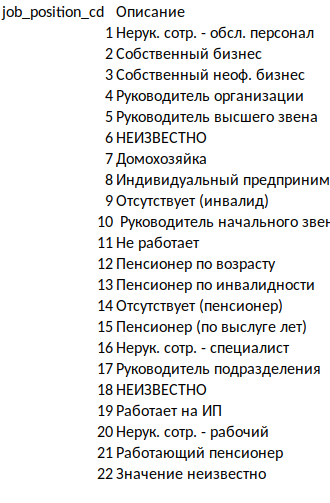

Ну тип понятно, из этого можно много всяких разных признаков сварганить. Можно, опять же, считать расстояние между юзерами для коллаборативной фильтрации.

## Файлы stories_reaction_train/stories_reaction_test

In [33]:
print(react_train.shape, react_test.shape)
react_train.head(3)

(473141, 4) (172049, 4)


,customer_id,story_id,event_dttm,event
0,15,138,2018-07-24 15:33:22,view
1,15,202,2018-06-04 08:08:08,skip
2,15,222,2018-06-17 13:44:45,skip


In [38]:
react_test.head(1)

,customer_id,story_id,event_dttm,answer_id
0,466906,1152,2018-08-01 00:00:46,0


In [35]:
react_train['event_dttm'] = react_train['event_dttm'].apply(pd.to_datetime)
react_test['event_dttm'] = react_test['event_dttm'].apply(pd.to_datetime)

In [36]:
react_train['event_dttm'].describe()

count                  473141
unique                 145692
top       2018-06-01 12:32:25
freq                       24
first     2018-03-29 11:30:44
last      2018-07-31 23:58:14
Name: event_dttm, dtype: object

In [37]:
react_test['event_dttm'].describe()

count                  172049
unique                  52832
top       2018-08-21 12:39:21
freq                       29
first     2018-08-01 00:00:46
last      2018-08-22 20:49:33
Name: event_dttm, dtype: object

Во, здесь уже time-based split, так что дату из будущего использовать не получится. Ну ок.

In [39]:
react_train.event.value_counts()

view       242312
skip       167567
like        56687
dislike      6575
Name: event, dtype: int64

Знакомьтесь, дети, так выглядит несбалансированная выборка. Мне кажется, тут можно тупо взять и скопировать по 100 раз каждую строку с дизлайком и по 5 - с лайком (потому что веса их кастомной целевой функции так относятся). Кажется, должно сработать.

In [40]:
train_stories = set(react_train.story_id.values)
test_stories = set(react_test.story_id.values)

both = train_stories & test_stories
only_train = train_stories - test_stories
only_test = test_stories - train_stories

print(f'Both: {len(both)}\nOnly train: {len(only_train)}\nOnly test: {len(only_test)}\n')
print(f'Train number: {len(train_stories)}\nTest number: {len(test_stories)}')

Both: 670
Only train: 243
Only test: 132

Train number: 913
Test number: 802


15 процентов историй из теста не встречаются в трейне. Такое себе, на коллаборативной фильтрации мы далеко не уедем, надо и content-based тоже делать.

In [42]:
import warnings
warnings.filterwarnings('ignore')

counts = react_train.story_id.value_counts().loc[test_stories].fillna(0.)
print(counts.median())

211.5


В среднем история из теста встречается в трейне 211 раз.

<img src="https://pbs.twimg.com/media/D9vSJq9WsAASKwk.jpg" alt="Drawing" style="width: 400px;"/>

In [46]:
train_c = set(react_train.customer_id.values)
test_c = set(react_test.customer_id.values)

print(f'Юзеров в трейне: {len(train_c)}\nВ тесте: {len(test_c)}')

Юзеров в трейне: 41001
В тесте: 22646


In [61]:
print(f'Всего юзеров, которые есть в stories_reaction_train, но которых нет в customer_train: ' +
     f'{len(train_c - id_train)}')
print(f'Всего юзеров, которые есть в stories_reaction_test, но которых нет в customer_test: ' +
     f'{len(test_c - id_test)}')
print('\n')
print(f'Всего юзеров, которые есть в stories_reaction_train, но которых нет в customer_test: ' +
     f'{len(train_c - id_test)}')
print(f'Всего юзеров, которые есть в stories_reaction_test, но которых нет в customer_train: ' +
     f'{len(test_c - id_train)}')
print('\n')
print(f'Всего юзеров, которые есть в stories_reaction_train, но которых нет в stories_reaction_test: ' +
     f'{len(train_c - test_c)}')
print(f'Всего юзеров, которые есть в stories_reaction_test, но которых нет в stories_reaction_train: ' +
     f'{len(test_c - train_c)}')

Всего юзеров, которые есть в stories_reaction_train, но которых нет в customer_train: 3178
Всего юзеров, которые есть в stories_reaction_test, но которых нет в customer_test: 0


Всего юзеров, которые есть в stories_reaction_train, но которых нет в customer_test: 0
Всего юзеров, которые есть в stories_reaction_test, но которых нет в customer_train: 1813


Всего юзеров, которые есть в stories_reaction_train, но которых нет в stories_reaction_test: 26741
Всего юзеров, которые есть в stories_reaction_test, но которых нет в stories_reaction_train: 8386


Ничего не понимаю. Зачем тогда вообще нужен customer_train? Что за бред вообще?

## В итоге ##

Очевидно, одной моделью мы не обойдемся, надо стакать много разных. Из действий, которые сейчас приходят на ум:
* Как модель первого уровня можно использовать какие-нибудь матричные разложения матрицы реакций на истории.
* Взять что-нибудь наподобие взвешенного knn, где расстояние между пользователями искать как косинусное на матрицы транзакций или реакций на истории.
* Нагенерить кучу фич из транзакций, реакций на истории и списка юзеров, а на них обучить зоопарк.
* Попробовать выделить фичи из текста историй.
* Можно попытаться кластеризовать пользователей и истории, это может сработать.

Отдельно стоит вопрос, обучать классификацию на четыре класса (дизлайк, скип, вью и лайк) или два (+1/-1). Мне кажется, можно насэмплить дизлайков и лайков, как я раньше писал, и обучать на два класса, а сдавать в систему предсказанные вероятности. Или же можно обучать классификацию на 4 класса, а дальше их как-то взвешенно сложить, но я пока что не понимаю, как.